**Part 3 - Linear Regression**

In [1]:
# I certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I did not receive any external help, coaching or contributions during the production of this work.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [3]:
winedf = pd.read_csv('winequality-red.csv')
winedf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
winedf.isnull().sum(axis=0)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
winedf.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
winedf.shape

(1599, 12)

In [7]:
winedf.dtypes


fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [8]:
normalizeddf = winedf.copy()

column = winedf.columns
normalizeddf[column] = (normalizeddf[column] - normalizeddf[column].min()) / (normalizeddf[column].max() - normalizeddf[column].min())    
  
display(normalizeddf)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.328767,0.08,0.075342,0.130217,0.436620,0.134276,0.354626,0.559055,0.149701,0.323077,0.4
1595,0.115044,0.294521,0.10,0.089041,0.083472,0.535211,0.159011,0.370778,0.614173,0.257485,0.430769,0.6
1596,0.150442,0.267123,0.13,0.095890,0.106845,0.394366,0.120141,0.416300,0.535433,0.251497,0.400000,0.6
1597,0.115044,0.359589,0.12,0.075342,0.105175,0.436620,0.134276,0.396476,0.653543,0.227545,0.276923,0.4


In [9]:
X = normalizeddf[winedf.columns[:12]]
X.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


In [10]:
ind = np.random.rand(len(X)) < 0.8

train = X[ind]
test = X[~ind]


In [11]:
X_train = train.iloc[:,[0,1,3,4,5,6,7,8,9,10,11]]
Y_train = train.iloc[:,2]

X_test = test.iloc[:,[0,1,3,4,5,6,7,8,9,10,11]]
Y_test = test.iloc[:,2]
#Target Y = quality.

In [12]:
print(X_train.shape, X_test.shape, Y_train.shape,Y_test.shape)


(1285, 11) (314, 11) (1285,) (314,)


In [13]:
X_train.head()

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,0.283186,0.520548,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
4,0.247788,0.397260,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
6,0.292035,0.328767,0.047945,0.095159,0.197183,0.187279,0.464758,0.440945,0.077844,0.153846,0.4
7,0.238938,0.363014,0.020548,0.088481,0.197183,0.053004,0.332599,0.511811,0.083832,0.246154,0.8


In [14]:
Y_train

1       0.00
2       0.04
4       0.00
6       0.06
7       0.00
        ... 
1593    0.08
1594    0.08
1595    0.10
1597    0.12
1598    0.47
Name: citric acid, Length: 1285, dtype: float64

In [15]:
def OLS(X_train,Y_train):
  W1 = np.linalg.inv(np.dot(X_train.T,X_train))
  W2 = np.dot(X_train.T,Y_train)
  W = np.dot(W1,W2)
  return W

def MSE(X_train,Y_train,W):
  wt = np.dot(X_train,W.T)
  se = ((Y_train-wt)**2)
  mse = 1/X_train.shape[0]*(np.sum(se))
  return mse

def fit(X_train,W):
  pred = np.dot(X_train,W)
  return pred

In [16]:
ols = OLS(X_train,Y_train)
ols.shape

(11,)

In [17]:

mse = MSE(X_train,Y_train,ols)

In [18]:
pred = fit(X_train,ols)

In [19]:
print(ols)
print(mse)
print(pred)

[ 0.71103736 -0.62314058  0.08059364  0.49556673 -0.18111954  0.41169259
  0.03989308  0.04211904  0.05631248  0.17491438  0.0262684 ]
0.012183859166497911
[0.07998223 0.13274149 0.09567994 ... 0.0616099  0.00722171 0.21069733]


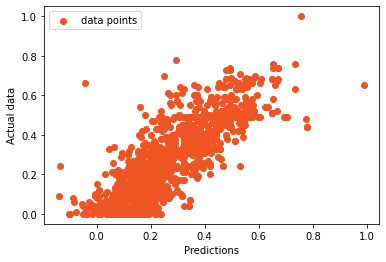

In [20]:
plt.scatter(pred,Y_train, c='#ef5423', label='data points')
plt.xlabel('Predictions')
plt.ylabel('Actual data')
plt.legend()
plt.show()